# 선형 회귀(Linear Regression)
- 선형회귀는최적선을 찾는것 최적선을 통해 예측함.
- 최적선을 찾기 위해 다양한 함수를 대입 이것이 가설 함수
- 머신러닝 :지도 학습, 비지도 학습, 강화 학습
- 선형회귀는 지도 학습이다.
- 지도 학습은 분류와 회귀로 나뉜다. 어떠한 집을 보고 아파트인지 오피스텔인지 주택인지 알아내는 것은
- 분류이다. 정해진 답 중에 고르는 것! 그러나 집 값을 고르는 즉 연속적인 값 중에서 선택하는 것은 회귀이다.
## 선형 회귀
- 목표 변수: target variable
- 입력 변수 : input variable
- 예를 들어 집 크기가 입력 변수이고 집 값이 목표 변수이다.
# 가설 함수 평가법
- 평균 제곱 오차(MSE)

### 평균 제곱 오차(MSE)
- 가설함수와 실제 값 사이의 오차값들의 제곱의 평균이며 MSE가 크다면 비효율적인 것이다.
- 제곱을 하는 이유는 음수를 양수로 통일하기 위해서 이다 또한 오차를 부각하기 위함이다.
### 손실함수
- 가설 수의 성능을 평가하는 함수
- 손실 함수가 작으면 가설함수가 데이터에 잘 맞는다.
- 크면 잘 안맞는다.
- MSE로 output
### 경사 하강법
- 손실함수의 극솟점을 찾고 싶다.

- mse를 미분하여  theta_0= theta_0-alpha*error.mean()
        theta_1=theta_1-alpha*(error*x).mean()
  이런식으로 설정한다. y값이 다른 이유는 theta_1미분을 하면 x가 튀어 나오기 떄문이다.

In [3]:
# 경사하강법 시각화
import numpy as np
import matplotlib.pyplot as plt
def prediction(theta_0,theta_1,x):
    return theta_0+theta_1*x
def prediction_difference(theta_0,theta_1,x,y):
    return prediction(theta_0,theta_1,x)-y

def gradient_descent(theta_0,theta_1,x,y,num_iterations, alpha):
    m= len(x)
    cost_list=[]# 손실 저장 리스트
     
    for i in range(num_iterations):
        error =prediction_difference(theta_0,theta_1,x,y)
        cost_list.append((error@error)/(2*m))
        theta_0= theta_0-alpha*error.mean()
        theta_1=theta_1-alpha*(error*x).mean()
        if(i%10==0):
            plt.scatter(house_size,house_price)
            plt.plot(house_size,prediction(theta_0,theta_1,x),color='red')
            plt.show()

    return theta_0, theta_1,cost_list

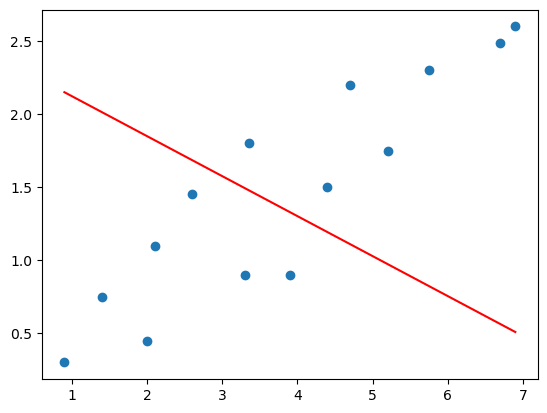

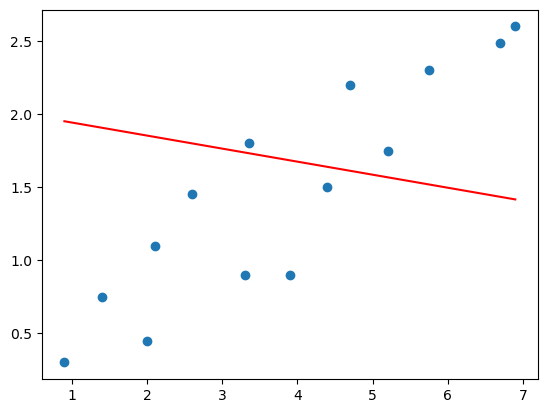

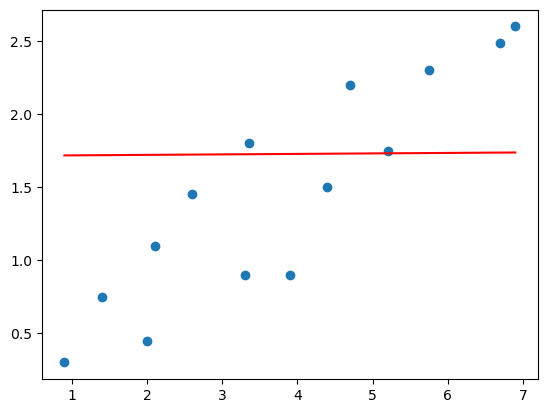

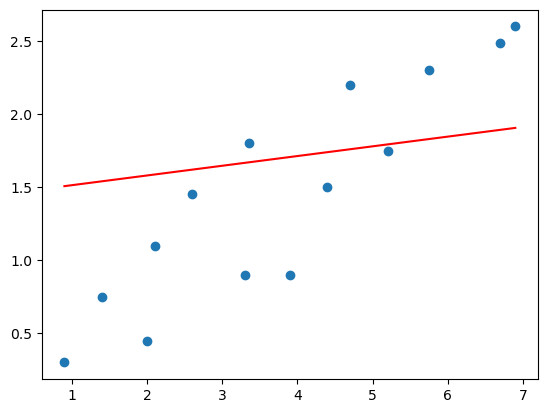

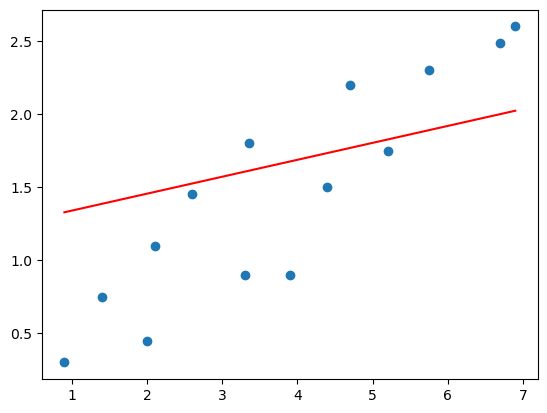

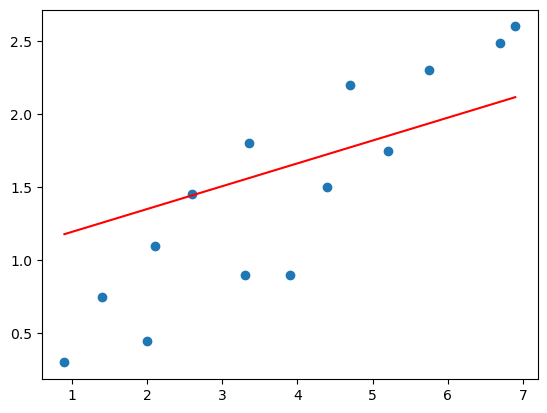

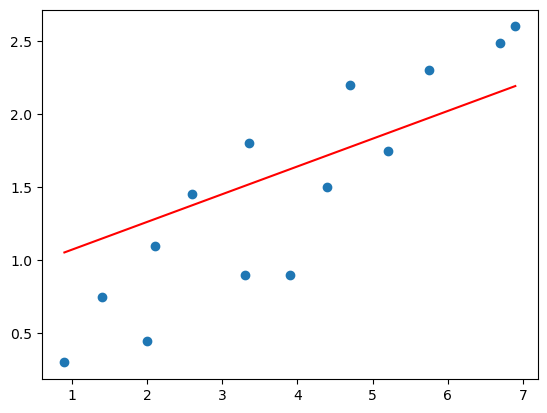

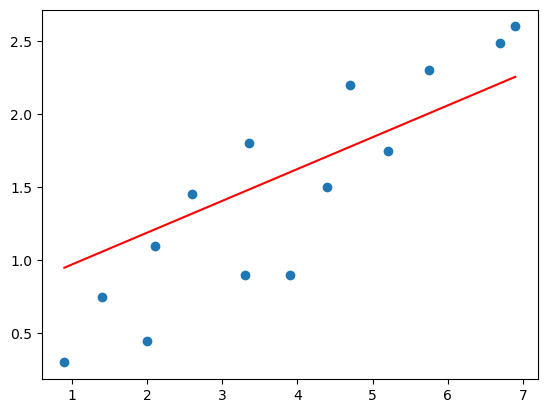

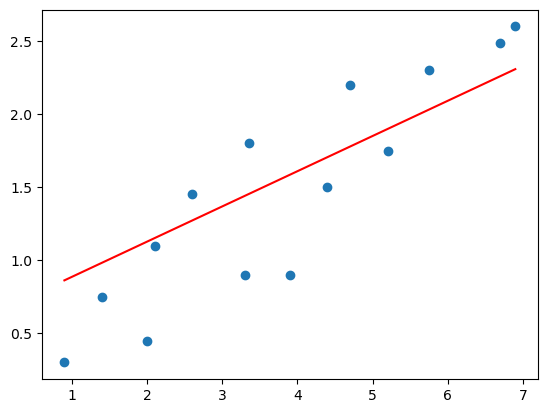

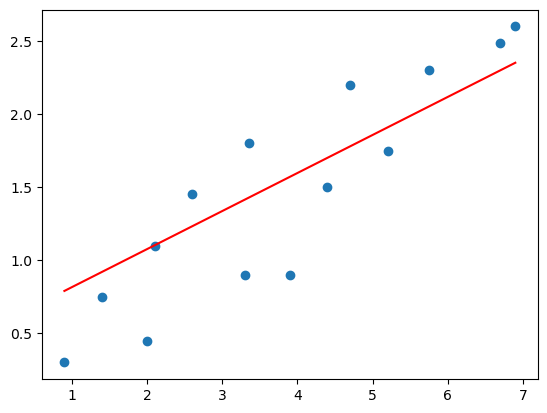

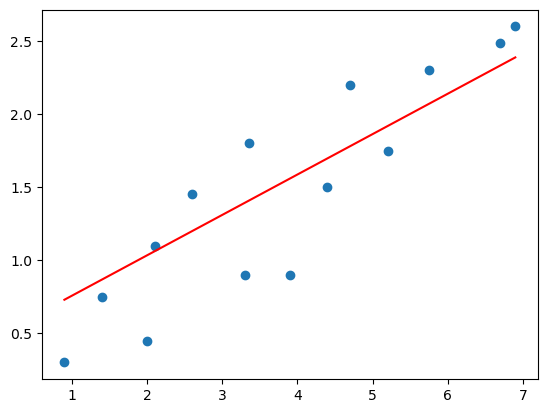

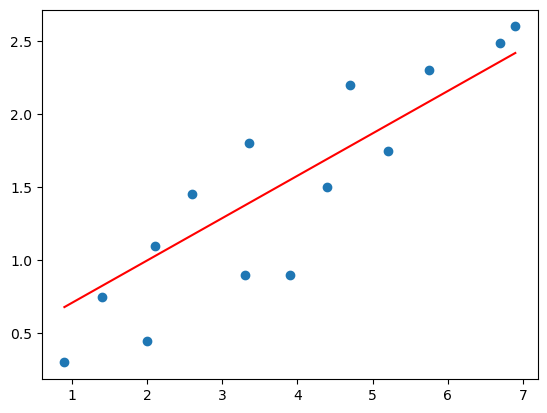

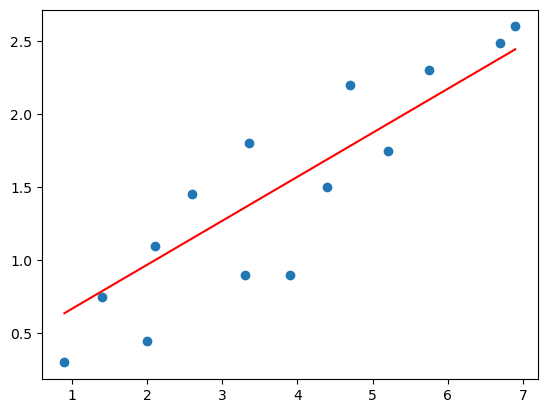

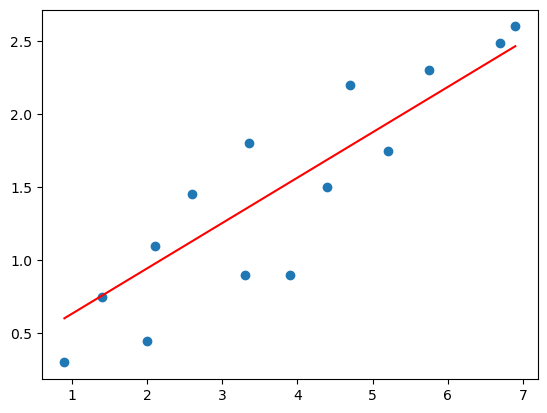

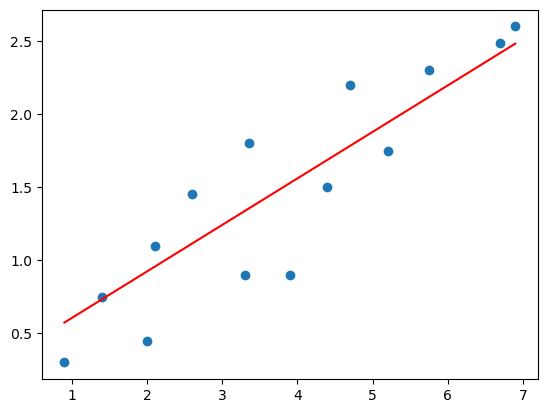

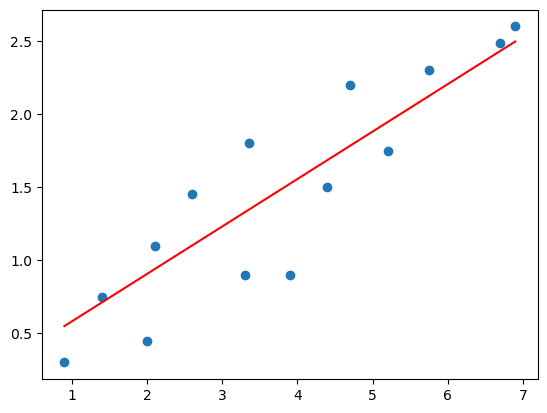

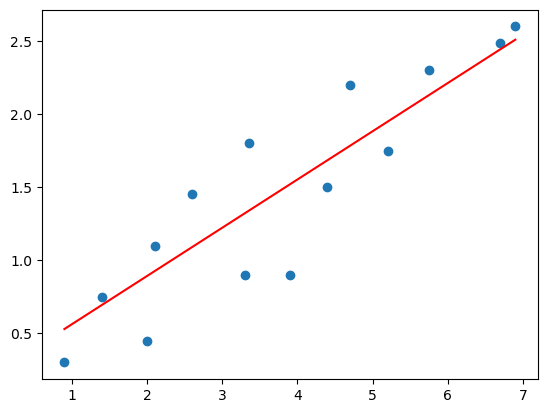

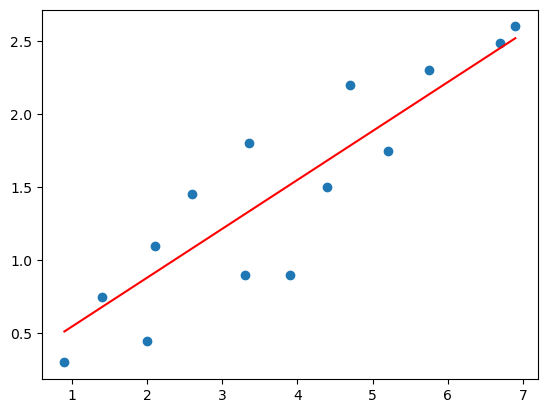

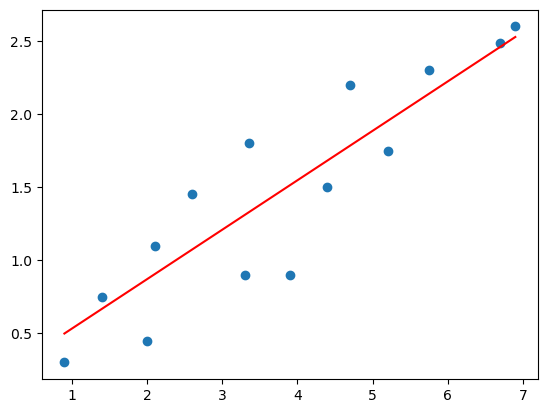

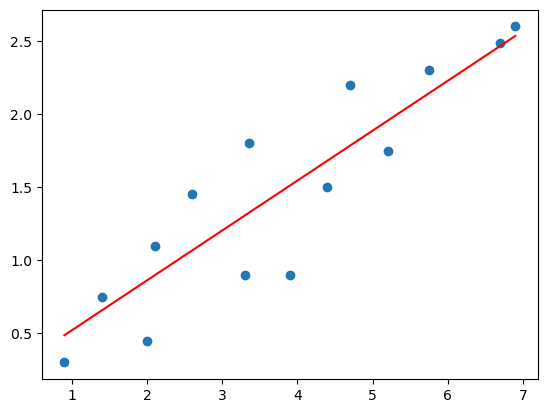

In [4]:
house_size=np.array([0.9,1.4,2,2.1,2.6,3.3,3.35,3.9,4.4,4.7,5.2,5.75,6.7,6.9])
house_price=np.array([0.3,0.75,0.45,1.1,1.45,0.9,1.8,0.9,1.5,2.2,1.75,2.3,2.49,2.6])

# theta 초기값 설정
th_0 =2.5
th_1 =0

th_0 ,th_1, cost_list=gradient_descent(th_0,th_1,house_size,house_price,200,0.1)

In [5]:
print(th_0,th_1)

0.16821801417752186 0.3438032402351199


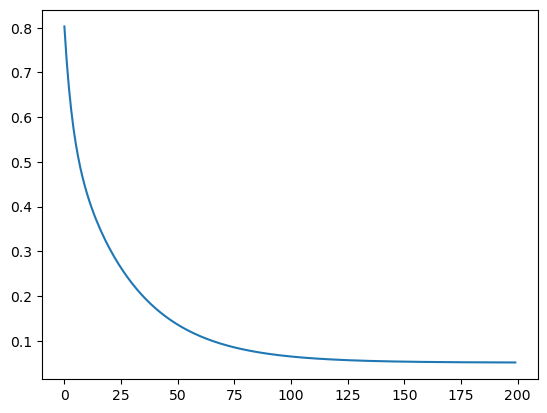

In [6]:
plt.plot(cost_list)
#경사하강을 반복할수록 손실이 줄어든다.

# 모델 평가
- 평균 제곱근 오차(RMSE) : 전에 배운 평균 제곱오차에 루트를 취하는 것이다.
- 그러나 함정이 있다. 데이터에 맞게 학습을 시켰다면 평균 제곱근 오차가 낮은건 당연한것이다.(과적합)
- 보통 모델의 학습 데이터와 평가 데이터를 나눈다.  traing_set, test_set
- traing_set으로 학습시켜 최적선을 구한후 test_set으로 RMSE평가를 진행한다.

In [10]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# 캘리포니아 주택 데이터셋 불러오기
california_housing = fetch_california_housing(as_frame=True)
print(california_housing.DESCR)  # 데이터셋 설명 출력

# 데이터와 타겟 값에 접근
data = california_housing.data
target = california_housing.target

# 데이터의 첫 몇 행 출력
print(data.head())
print(target.head())

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [12]:
# 캘리포니아 주택 데이터셋 로드
california_housing = fetch_california_housing(as_frame=True)

# DataFrame 생성
x = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [14]:
# 우리는 입력 변수하나만을 위한 함수를 배웠다.
x=x[['HouseAge']] #데이터프레임x['HouseAge']라면 시리즈이다.


In [16]:
x


,HouseAge
0,41.0
1,21.0
2,52.0
3,52.0
4,52.0
...,...
20635,25.0
20636,18.0
20637,17.0
20638,18.0


In [35]:
# 타겟 값을 DataFrame으로 변환
y = pd.DataFrame(california_housing.target, columns=['MedHouseVal'])


In [37]:
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [41]:
from sklearn.model_selection import train_test_split


In [42]:
# 경사하강법 실습해보기
# 1. 데이터 셋 나누기
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=5)
#80퍼 센트는 트레이닝 셋

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 1)
(4128, 1)
(16512, 1)
(4128, 1)


In [47]:
# 선형회귀 모델 학습하기
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [49]:
model.coef_ #세타 0

array([[0.0089758]])

In [53]:
model.intercept_ #세타 1

array([1.80742009])

In [55]:
#f(x) =1.80742009, 0.0089758

In [57]:
#평가 하는법 test로 평가한다.
y_test_prediction=model.predict(x_test)
y_test_prediction #예측값들 ytest에는 실제
# 이제 모델을 평가하려면 위에서 사용했던 평균 제곱근 오차를 활용한다.

array([[1.93308132],
       [1.96898453],
       [2.04079095],
       ...,
       [2.10362156],
       [2.20235539],
       [2.14850057]])

In [61]:
from sklearn.metrics import mean_squared_error #평균 제곱근 오차를 사용하기 위해
mean_squared_error(y_test,y_test_prediction)** 0.5
# 평가 결과 1.16 이모델을 사용한다면 1000달러 정도의 오차가 나올수 있다는 것이다.

1.1650449718027611